# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

1. Facebook (undirected): The network would be a representation of social relations.
    - Nodes = Individuals
    - Edges = Friendsship on facebook 
2. Publications (directed): The network could be used to cluster academic fields of research, as well as explore popular/higly citated/interdisciplinary papers/fields 
    - Nodes = Academic papers
    - Edges = Citations of/from other academic papers
3. Communication in an organisation (directed)
    - Nodes = Employees
    - Edges = Emails, text-messages, phone-calls
 

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:

I find the power elite network very interesting - it was constructed by 2 sociologists.
>   * What are its nodes and links? 
        - The nodes are people/individuals and the links are shared attendance in public events or positions in boards of directors. The network is thus a formal one, as the links are professional relations   
>   * How large is it?
        - It ultimatly consisted of 423 individuals
>   * Can be mapped out? 
        - It can, and has been: 
<center><img src='https://www.politikensforlag.dk/_files_media/ck_uploads/magteliten_poster_a1_300dpi_900px_110148.jpg' alt="Drawing" style="width: 800px;"/></center>

>   * Why do you care about it? 
        - It's a interesting visualisation of 'power' and how it is structured / clustered in the danish society. 

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

We think the possibilities of mapping communication channels seems extremely relevant and practical. With the corona-virus a big problem for the Italian government in the corona crisis was the problem of organising a joint effort against corona. The Italian health care system was highly decentralised and therefore there was no coordinated plan for dealing with corona, different places tried very different strategies. Maybe if a network scientist had mapped the Italian system it would had been faster and easier to make a collective plan towards restricting corona.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

Religious minority groups such as the jewish community in denmark or jehovas witnesses. The edges would then be the relations between members. 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

Nodes: ['Frank', 'Bent', 'Jens', 'Peter', 'Søren', 'Martin']
Edges: [('Frank', 'Peter'), ('Frank', 'Jens'), ('Frank', 'Bent'), ('Frank', 'Søren'), ('Jens', 'Martin')]


/Users/Esben/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


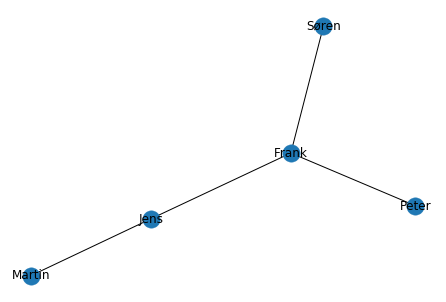

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

#1 - add nodes and edges
G.add_nodes_from(['Frank','Bent','Jens','Peter','Søren','Martin'])
G.add_edge('Frank','Peter')
G.add_edge('Frank','Jens')
G.add_edge('Jens','Martin')
G.add_edge('Frank','Bent')
G.add_edge('Frank','Søren')

# 2 - print edges and nodes
print('Nodes:', G.nodes())
print('Edges:',G.edges())

# Delete a node
G.remove_node('Bent')

#4 plot it
nx.draw(G, pos=nx.spring_layout(G), with_labels = True)
plt.show()

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

An ER-network is a randomly generated graph/network, which has n nodes and a probability of connectivity between each node-pair of p. That is, the probablity that a notepair is connected by an edge is p. 

In [263]:
################### Define plotfunction function for the rest of the assignment #################
## Sorry - the transparency of how i/we solved the different assignment suffers from this
## But it is convenient.
def plot_dist(Graph, 
              Log_y = False, 
              Log_x = False,
              direct_in = False,
              direct_out = False, 
              prob = False, 
              dist_overlay = False):
    
    # Extract the degrees for each node
    degrees_list = [k for n,k in Graph.degree()]
    
    # Overwrite if intereste in in- and out- degrees
    if direct_in == True: # To plot in-degrees in directed nx 
        Graph.remove_nodes_from(list(nx.isolates(Graph))) # Remove nodes with degree 0
        degrees_list = [k for n,k in Graph.in_degree()]
        
    if direct_out == True: # To plot out-degrees in directed nx 
        Graph.remove_nodes_from(list(nx.isolates(Graph))) # Remove nodes with degree 0
        degrees_list = [k for n,k in Graph.out_degree()]
        
    # Count occurances
    deg_count = Counter(degrees_list)
    # Zip through dict with degrees as key and count as value
    deg, count = zip(*deg_count.items())
    
    #For probability of degrees
    N = Graph.number_of_nodes() # number of nodes in network
    prob_k = [counted/N for counted in count] # probablity of k degrees

    #Plot
    fig, ax = plt.subplots(1, 2,figsize = (15,7))

    #Probability Distribution plot
    ax[0].set_title("Degree Distribution")
    ax[0].set_ylabel("Probability")
    ax[0].set_xlabel("Degree")
    sns.distplot(degrees_list, ax = ax[0], hist=True)

    #Counter/Probability scatterplot
    ax[1].set_xlabel("Degree")
    if prob == True: # For probability scatterplots
        ax[1].set_title("Probability of Degrees")
        ax[1].set_ylabel("Probability")
        if dist_overlay == True: sns.kdeplot(degrees_list, shade=True, ax = ax[1])
        plt.scatter(deg, prob_k)
        
    elif prob == False: # For counter scatterplots
        ax[1].set_title("Count of Degrees")
        ax[1].set_ylabel("Count")
        plt.scatter(deg, count)
    ax[1].set_xticks([d + 0.4 for d in deg])
    ax[1].set_xticklabels(deg)
    
    #Log scale option
    if Log_y == True:
        plt.yscale("log")
    if Log_x == True:
        plt.xscale("log")
    # Change some titles and stuff if in- og out-degrees:
    if direct_in == True:
        ax[0].set_title("In-Degree Distribution")
        ax[0].set_xlabel("In-Degree")
        ax[1].set_xlabel("In-Degree")
        ax[1].set_title("Count of In-Degrees")
    if direct_out == True:
        ax[0].set_title("Out-Degree Distribution")
        ax[0].set_xlabel("Out-Degree")
        ax[1].set_xlabel("Out-Degree")
        ax[1].set_title("Count of Out-Degrees")
    plt.show()


/Users/Esben/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


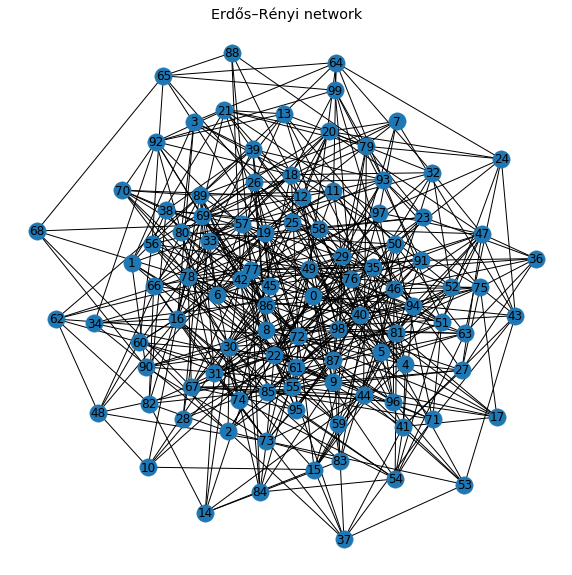

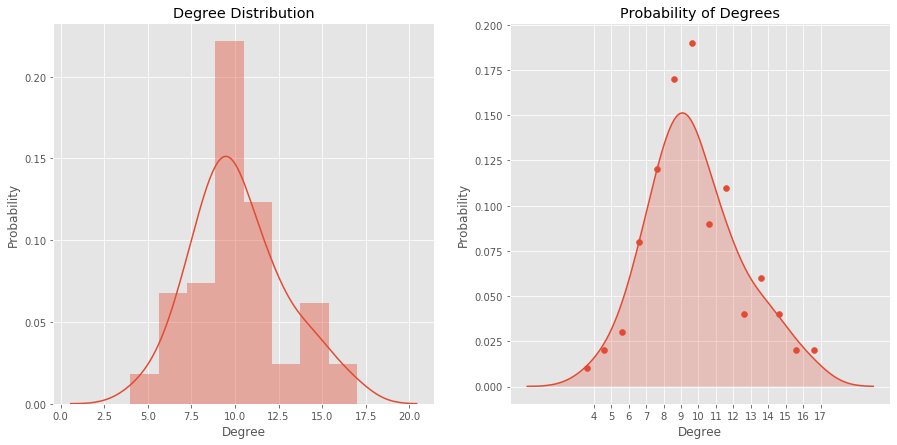

In [264]:
n=100 # number of nodes
p=0.1 # probability of connectivity
G=nx.gnp_random_graph(n,p) #Generate

#Plot
fig, ax = plt.subplots(1,1, figsize = (10,10))
nx.draw(G, pos=nx.spring_layout(G), ax=ax, with_labels = True)
plt.title('Erdős–Rényi network')
plt.show()

# Plot ER graph
plot_dist(G, prob=True, dist_overlay=True)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

A BA network starts with $m_0$ nodes, which are randomly connected, as long as each nodes has at least one edge. The network then grows in a recuring fashion, where a new node is added to the network in each step. The new node is connected to $m$ of the already existing nodes with $m$ edges. The decision/probablity of which nodes the new node should connect with is based on **preferential attachment**. This means that the new node is most likely to connect with nodes that have high degrees. This means that most of the nodes will probably end up with small a degree while some few (a hub) will have very large ones. This kind of skewed probability distribution, which formally is said the follow a powerlaw ($P(k)$ ~ $k^{-\gamma}$) is refered to as a **scale-free network**.  

In summary:
`A network of $m_0$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree.`


/Users/Esben/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


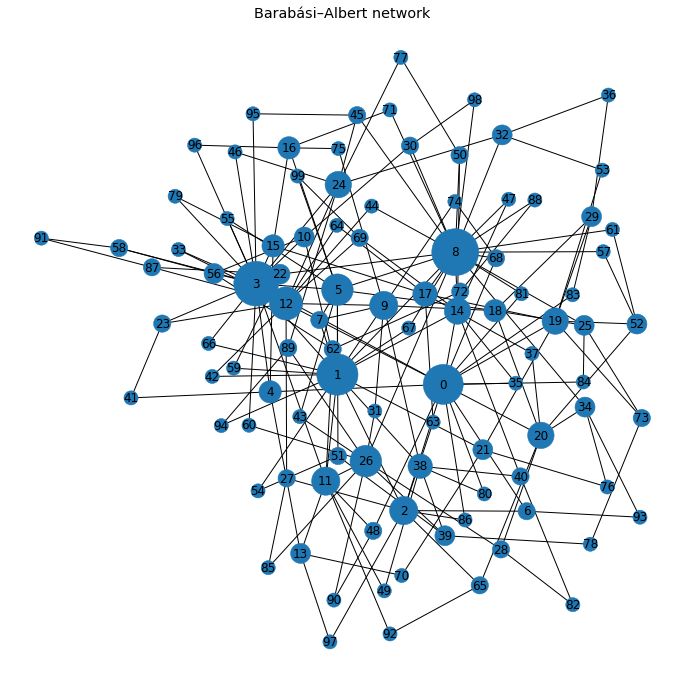

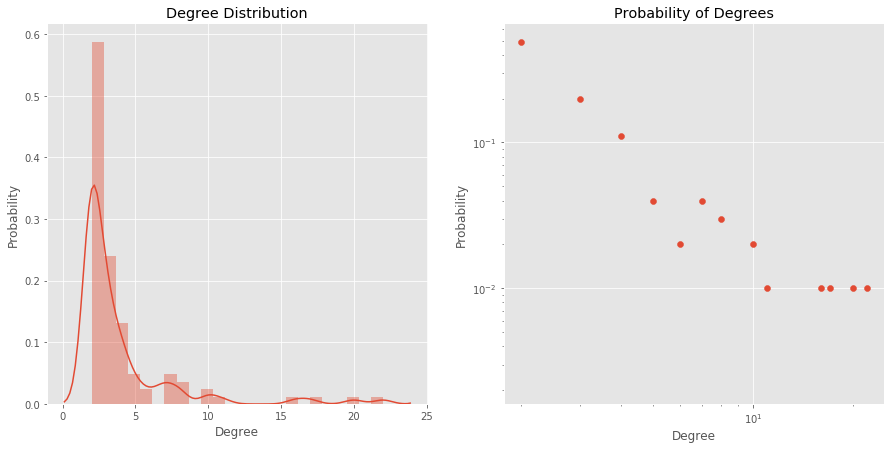

In [267]:
n = 100 # Nodes
m = 2 # edges for new nodes
G = nx.barabasi_albert_graph(n,m) # grow network
d = dict(G.degree) # degrees in dict

#Plot - node size depend on degrees
fig, ax = plt.subplots(figsize=(12,12))
nx.draw(G,
        nodelist=d.keys(),
        node_size=[v * 100 for v in d.values()], # 100 is an arbitrary scalar for the size. 
        ax = ax,
        with_labels= True)

plt.title('Barabási–Albert network')
plt.show()

#Plot distribution - With log
plot_dist(G, Log_x = True, Log_y = True, prob = True)

**Answer:** We can see from the labels in the network, that the intitial nodes are the biggest/have the most degrees. 

We see that the degree distribution is much more skewed/unevenly distributed for the BA network. In the ER network, the distribution is almost a normal distribution, but with BA the distribution has a long 'right' tail, as a few of the nodes have many more degrees than the majority of the nodes on the network.

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [3]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

# Each line contains two anonymized user identifiers, meaning 
# the second user posted on the first user's wall
data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [170]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
                                       # There are 86400 sekunds in a day
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [124]:
#Function to slice data - set how many days before last post for both upper and lower bound
def slice_data(t0_in=7, t1_in=0):
    t0 = data.timestamp.max() - 86400 * t0_in  # Lower bound of time-slice (t0_in days before last wall post)
    t1 = data.timestamp.max() - 86400 * t1_in   # Upper bound of time-slice (t1_in days before last wall post)

    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

# Network of last 365 days
G_365 = slice_data(t0_in=365)
print('Nodes in network:', G_365.number_of_nodes())
print('Edges in network:', G_365.number_of_edges())

Nodes in network: 44397
Edges in network: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

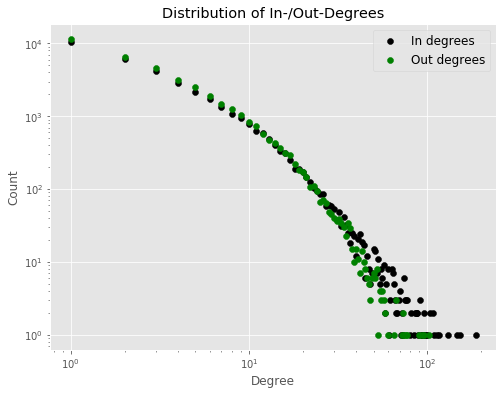

In [49]:
############################ Overlay Plot ######################
N = G_365.number_of_nodes() # number of nodes in network
#In-degrees
degrees_in_list = [k for n,k in G_365.in_degree()]
#Delete nodes with 0 degrees
degrees_in = [degree for degree in degrees_in_list if degree != 0]
deg_in_count = Counter(degrees_in)
deg_in, count_in = zip(*deg_in_count.items())
prob_in_k = [counted/N for counted in count_in] # probablity of k degrees

#Out-degrees
degrees_out_list = [k for n,k in G_365.out_degree()]
#Delete nodes with 0 degrees
degrees_out = [degree for degree in degrees_out_list if degree != 0]
degrees_out_count = Counter(degrees_out)
deg_out, count_out = zip(*degrees_out_count.items())
prob_out_k = [counted/N for counted in count_out] # probablity of k degrees                       

#Plot
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xlabel("Degree")
ax.set_title("Distribution of In-/Out-Degrees")
ax.set_ylabel("Count")
plt.scatter(deg_in, count_in, color = 'k', label = 'In degrees')
plt.scatter(deg_out, count_out, color = 'g', label = 'Out degrees')
plt.yscale("log")
plt.xscale('log')
ax.legend(fontsize = 'large')
plt.show()

The plot resembels the degree distribution of a BA network.

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

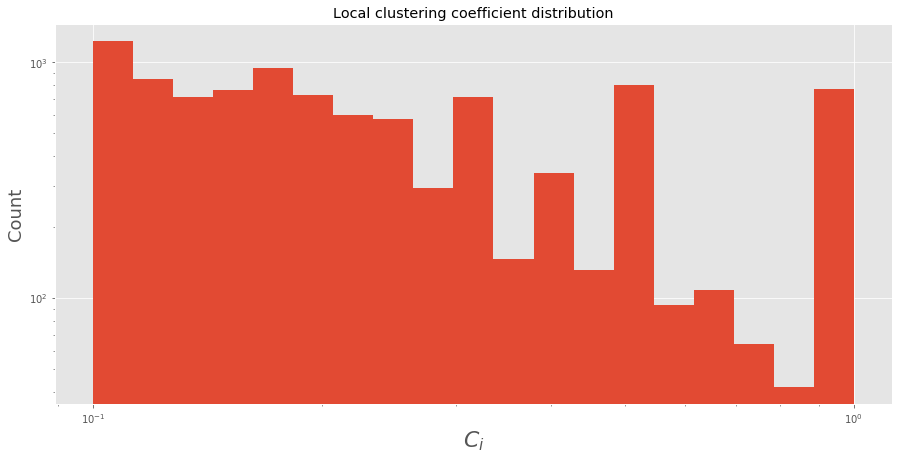

In [54]:
# Output is a dict with the node as key and c_i as value
cluster_deg = nx.clustering(G_365)
# Unpack c_i from dict
node, c_i = zip(*cluster_deg.items())
#Plot 
fig, ax = plt.subplots(1, 1,figsize = (15,7))
#Plot hist with logarithmical bins
plt.hist(c_i, bins=np.logspace(np.log10(0.1),np.log10(1), 20))
#Set x_axis to a logarithmical scale
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
ax.set_xlabel("$C_i$", fontsize = 22)
ax.set_ylabel("Count", fontsize = 18)
ax.set_title('Local clustering coefficient distribution')
plt.show()

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [173]:
############################# FINDING A THRESHOLD #############################
# Create network
G_365 = slice_data(t0_in=365)
#Set initual threshold
threshold = 1

# Both edges and nodes shall match the criterion of 5000 nodes and 20000 edges.
# We have chosen to remove the nodes with the smallest degrees until these
#criterions are met, as we figure that the most interesting part about the
#network are the hubs with high degrees, as opposed to the nodes with just a 
# Few. The high-degree nodes would be more interesting to analyse, e.g. with
# a power- or social capital pespective.
while (len(G_365.edges()) >= 20000 or len(G_365.nodes()) >= 5000):
    G_365 = slice_data(t0_in=365) # create the network
    if threshold % 5 == 0: # Keep track of loop
        print('Loop nr:', threshold)
    # With directed network, the G.degree() sums in- and out- degrees. 
    # output is a list of tuples with (node, degrees)
    #set nodes to remove
    to_remove = [node for node,degree in G_365.degree() if degree < threshold]
    #Remove from network
    G_365.remove_nodes_from(to_remove)
    #Set new threshold
    threshold += 1 

# Print info when criterions are met.
print(len(to_remove), 'nodes have been removed with threshold =', threshold-1)
print(len(G_365.edges()), 'edges remain in the network')
print(len(G_365.nodes()), 'nodes remain in the network')

Loop nr: 5
Loop nr: 10
Loop nr: 15
Loop nr: 20
Loop nr: 25
Loop nr: 30
42350 nodes have been removed with threshold = 33
19873 edges remain in the network
2047 nodes remain in the network


In [169]:
visualize(G_365)

(None, None)

<img src="network.png">